Initial condition b = -0.4517671325360407


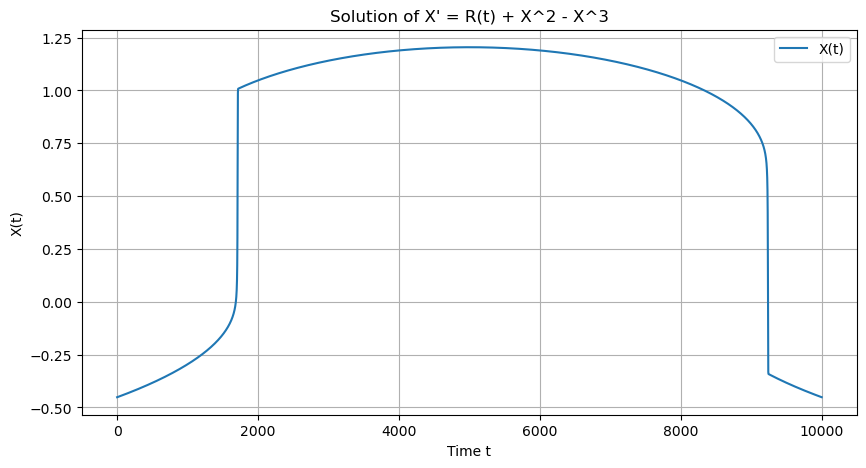

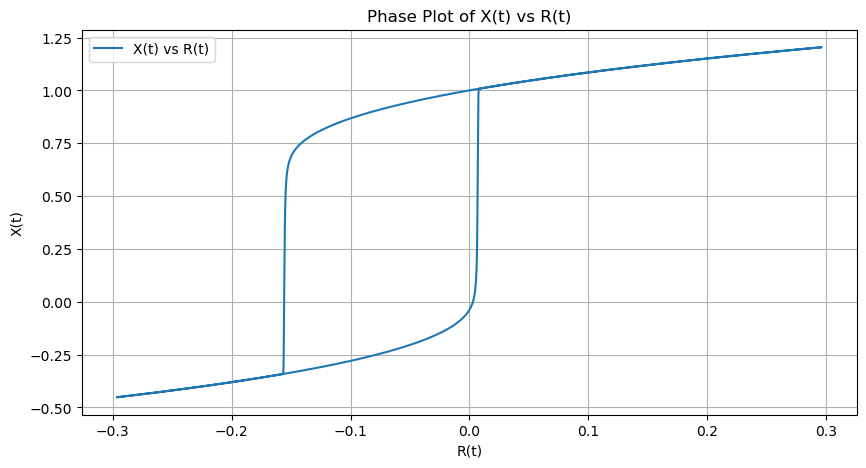

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# Define constants
R1 = -8 / 27
A = 16 / 27
epsi = 0.0001

# Define the cubic equation for the initial condition
def cubic_eq(X):
    return R1 + X**2 - X**3

# Use fsolve to find the unique real solution 'b' of the cubic equation
# Provide an initial guess close to the expected root
initial_guess = -0.5
b = fsolve(cubic_eq, initial_guess)[0]

print(f"Initial condition b = {b}")

# Define the periodic time-dependent function R(t)
def R(t):
    return R1 + A * np.sin(np.pi * epsi * t)

def dXdt(X, t):
    return R(t) + X**2 - X**3

# Time range from t = 0 to t = 100
t = np.linspace(0, 10000, 100000)

# Solve the ODE using the initial condition X(0) = b
X = odeint(dXdt, b, t).flatten()

# Compute R(t) values for plotting
R_values = R(t)

# Plot X(t)
plt.figure(figsize=(10, 5))
plt.plot(t, X, label='X(t)')
plt.xlabel('Time t')
plt.ylabel('X(t)')
plt.title('Solution of X\' = R(t) + X^2 - X^3')
plt.legend()
plt.grid(True)
plt.show()

# Plot the pair (R(t), X(t))
plt.figure(figsize=(10, 5))
plt.plot(R_values, X, label='X(t) vs R(t)')
plt.xlabel('R(t)')
plt.ylabel('X(t)')
plt.title('Phase Plot of X(t) vs R(t)')
plt.legend()
plt.grid(True)
plt.show()
